In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
FitToolsPath = env('FitToolsPath') #* get the path of the script
root_Data        = env('DataSet_Dogs_Vs_catsPath')         #* get the path of the dataSet of the fist 12_000 img of https://www.kaggle.com/c/dogs-vs-cats
root_Data_Val    = env('DataSet_Dogs_Vs_catsValPath')      #* get the path of the dataSet of the last 500 img of https://www.kaggle.com/c/dogs-vs-cats
model_save_dir   = env('model_save_dir')   #* get the path where we will save the model


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitToolsPath)


import torch
import torchvision.transforms as transforms
from DataSets.dataSet_CatsVsDogs import DataSet_Img_To_Label
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)  

device =  cuda


In [3]:
image_Height   = 300
image_Width    = 300
image_Channels = 3
batch_size     = 64

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


data_augmentation = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height, image_Width)),
                        # transforms.RandomRotation(degrees = 5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])


myDataSet     = DataSet_Img_To_Label(root_Data,     data_augmentation, test = False, dataSize = 3000)
myDataSetVal  = DataSet_Img_To_Label(root_Data_Val, data_augmentation, test = False, dataSize = 300) 
print("len(myDataSet) = ", len(myDataSet))
print("len(myDataSetVal) = ", len(myDataSetVal))

len(myDataSet) =  24000
len(myDataSetVal) =  1000


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from Models.models_CatsVsDogs import modelCNN
from Models.models_CatsVsDogs import modelSiLU

myModel = modelSiLU(HEIGHT = image_Height, WIDTH = image_Width, CHANNELS = image_Channels)

In [6]:
import importlib

import fitTools.fitFunctionsForCatsVsDogs
importlib.reload(fitTools.fitFunctionsForCatsVsDogs)
from fitTools.fitFunctionsForCatsVsDogs import trainerCatsVsDogs

import torch.nn as nn
from torch import optim
import torch.nn.functional as F


myTrainer = trainerCatsVsDogs(model = myModel,
                            dataSet = myDataSet,
                            device = device,
                            batch_size = 128,
                            dataSet_Val = myDataSetVal,
                            model_save_dir = model_save_dir
                            )


In [7]:
# import torch.nn as nn
# from torch import optim
# import torch.nn.functional as F
# from fitTools.fitFunctionsForCatsVsDogs import train_modelCNN

# criterion = nn.BCELoss()
# criterion = torch.nn.MSELoss()
criterion = nn.CrossEntropyLoss()
opt_model = optim.Adam(myModel.parameters(), lr = 0.001)
myTrainer.trainModel(opt_model=opt_model, criterion= criterion, num_epochs = 10)


  0%|          | 0/188 [00:00<?, ?it/s]C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Epoch 1/10 process: 99: 100%|██████████| 188/188 [02:19<00:00,  1.34it/s, modelLoss=0.489]


Epoch completed, TRAIN MAE: 0.6175
Epoch completed, TRAIN ACC: 0.7086
Epoch completed, VAL MAE: 0.5661
Epoch completed, VAL ACC: 0.7750


Epoch 2/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.79it/s, modelLoss=0.604]


Epoch completed, TRAIN MAE: 0.5363
Epoch completed, TRAIN ACC: 0.7771
Epoch completed, VAL MAE: 0.5096
Epoch completed, VAL ACC: 0.8040


Epoch 3/10 process: 99: 100%|██████████| 188/188 [01:08<00:00,  2.75it/s, modelLoss=0.457]


Epoch completed, TRAIN MAE: 0.4804
Epoch completed, TRAIN ACC: 0.8082
Epoch completed, VAL MAE: 0.4739
Epoch completed, VAL ACC: 0.8180


Epoch 4/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.77it/s, modelLoss=0.344]


Epoch completed, TRAIN MAE: 0.4322
Epoch completed, TRAIN ACC: 0.8336
Epoch completed, VAL MAE: 0.4630
Epoch completed, VAL ACC: 0.8100


Epoch 5/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.77it/s, modelLoss=0.401]


Epoch completed, TRAIN MAE: 0.3983
Epoch completed, TRAIN ACC: 0.8477
Epoch completed, VAL MAE: 0.4253
Epoch completed, VAL ACC: 0.8290


Epoch 6/10 process: 99: 100%|██████████| 188/188 [01:06<00:00,  2.83it/s, modelLoss=0.345]


Epoch completed, TRAIN MAE: 0.3631
Epoch completed, TRAIN ACC: 0.8644
Epoch completed, VAL MAE: 0.4072
Epoch completed, VAL ACC: 0.8290


Epoch 7/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.79it/s, modelLoss=0.375]


Epoch completed, TRAIN MAE: 0.3276
Epoch completed, TRAIN ACC: 0.8830
Epoch completed, VAL MAE: 0.4425
Epoch completed, VAL ACC: 0.8180


Epoch 8/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.79it/s, modelLoss=0.291]


Epoch completed, TRAIN MAE: 0.3081
Epoch completed, TRAIN ACC: 0.8894
Epoch completed, VAL MAE: 0.3943
Epoch completed, VAL ACC: 0.8390


Epoch 9/10 process: 99: 100%|██████████| 188/188 [01:07<00:00,  2.78it/s, modelLoss=0.296]


Epoch completed, TRAIN MAE: 0.2757
Epoch completed, TRAIN ACC: 0.9051
Epoch completed, VAL MAE: 0.3759
Epoch completed, VAL ACC: 0.8560


Epoch 10/10 process: 99: 100%|██████████| 188/188 [01:36<00:00,  1.94it/s, modelLoss=0.204]


Epoch completed, TRAIN MAE: 0.2498
Epoch completed, TRAIN ACC: 0.9169
Epoch completed, VAL MAE: 0.3875
Epoch completed, VAL ACC: 0.8500


In [8]:
import os

files = os.listdir(model_save_dir)
file_paths = [os.path.join(model_save_dir, file) for file in files]
file_paths.sort(key=os.path.getmtime, reverse=True)

lastSavedModel = file_paths[0]
print(lastSavedModel)

C:/Users/malekir1/Documents/Repositories/DeepLearningToolkit/TestNotebooks/fitedModels\checkpoint_epoch_10_ACC_Val_0.850.pt


In [9]:

#* load the best model
myModel.load_state_dict(torch.load(lastSavedModel)['model_state_dict'])

<All keys matched successfully>

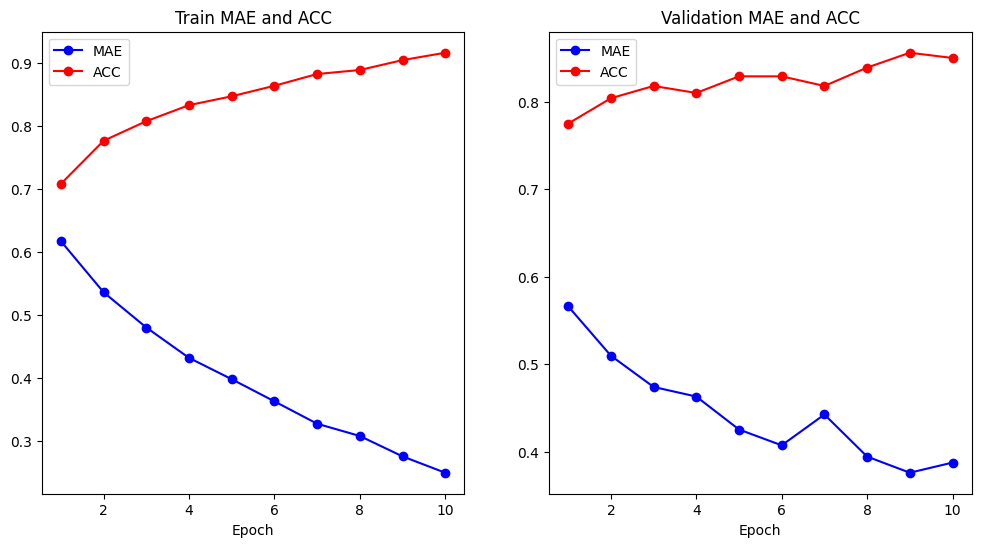

In [10]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(myTrainer.history['train_MAE']) + 1)
Epochs_values_Val = range(1, len(myTrainer.history['train_MAE']) + 1)


# Create two subplots (one for MAE and one for MAE_Val) in a single row
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE and ACC in train at the first subplot
plt1.plot(Epochs_values,     myTrainer.history['train_MAE'], marker='o', color='blue', label='MAE')
plt1.plot(Epochs_values_Val, myTrainer.history['train_ACC'], marker='o', color='red', label='ACC')
# plt1.set_ylabel('train MAE and ACC')
plt1.set_xlabel('Epoch')
plt1.set_title('Train MAE and ACC')

# Plot MAE and ACC in validation at the second subplot
plt2.plot(Epochs_values,     myTrainer.history['val_MAE'], marker='o', color='blue', label='MAE')
plt2.plot(Epochs_values_Val, myTrainer.history['val_ACC'], marker='o', color='red', label='ACC')
# plt2.set_ylabel('MAE and ACC')
plt2.set_xlabel('Epoch')
plt2.set_title('Validation MAE and ACC')


# Add legend to each subplot
plt1.legend()
plt2.legend()



# Show the plots
plt.show()


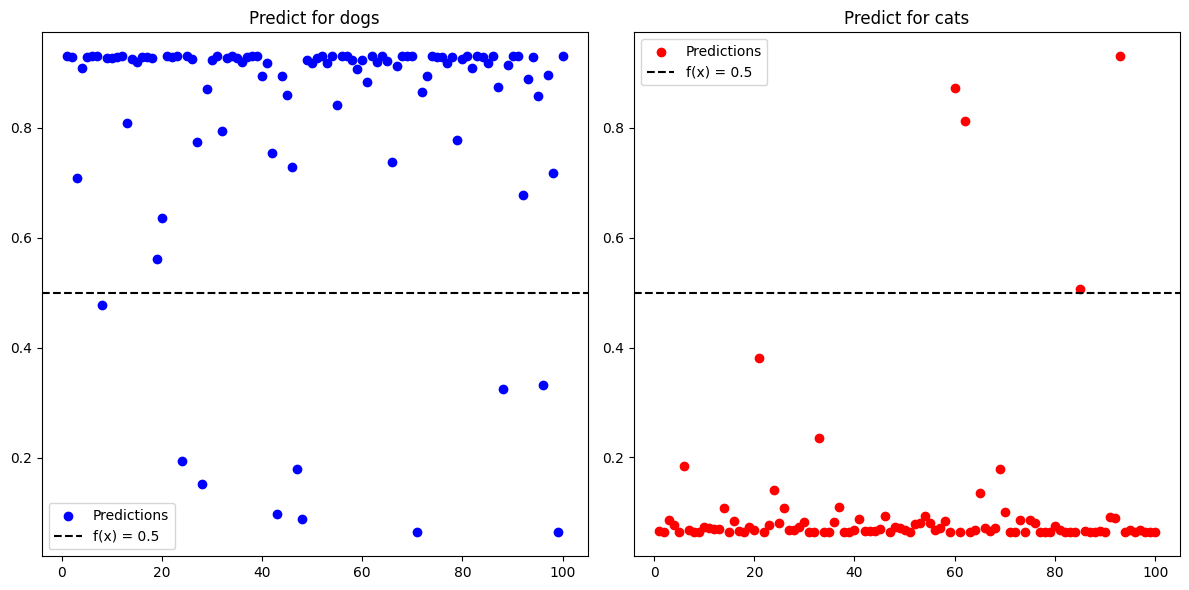

In [11]:
import numpy as np
import os
from PIL import Image

img_pth = root_Data + '/'

dog_paths = ['dog.' + str(i) + '.jpg' for i in range(0, 100)]
cat_paths = ['cat.' + str(i) + '.jpg' for i in range(0, 100)]

def getArrayBatch(paths):

    tensor_batch = []
    for path in paths:
        img  = os.path.join(img_pth + path)
        img  = np.array(Image.open(img))
        img  = img [:, :, :3]
        img = data_augmentation(img)
        tensor_batch.append(img)

    tensor_batch = torch.stack(tensor_batch).to(device)
    with torch.no_grad():
        myModel.eval()
        tensor_batch = myModel(tensor_batch)
    tensor_batch = torch.softmax(tensor_batch, dim=1)[:, 0].cpu().detach().numpy()  # Extract probability for the positive class
    # tensor_batch = tensor_batch.cpu().detach().numpy()
    return tensor_batch

predict_Array_dogs = getArrayBatch(dog_paths)
predict_Array_cats = getArrayBatch(cat_paths)

import matplotlib.pyplot as plt

num_images_dogs     = range(1, len(predict_Array_dogs) + 1)
num_images_cats = range(1, len(predict_Array_dogs) + 1)

fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

#* Plot points for dogs
plt1.scatter(num_images_dogs, predict_Array_dogs, marker='o', color='blue', label = 'Predictions')
plt1.set_title('Predict for dogs')

#* Plot points for cats
plt2.scatter(num_images_cats, predict_Array_cats, marker='o', color='red', label = 'Predictions')
plt2.set_title('Predict for cats')

#* Add horizontal line at y=0.5
plt1.axhline(y=0.5, color='black', linestyle='--', label='f(x) = 0.5')
plt2.axhline(y=0.5, color='black', linestyle='--', label='f(x) = 0.5')

#* Add legends
plt1.legend()
plt2.legend()

plt.tight_layout()
plt.show()



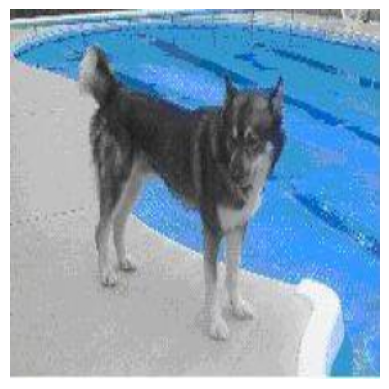

array([0.43406066], dtype=float32)

In [12]:
#TODO use the model 
import os 
from PIL import Image

img_pth = root_Data_Val + '/dog.12403.jpg' 

img  = os.path.join(img_pth)
img  = np.array(Image.open(img))
img  = img [:, :, :3]
img  = data_augmentation(img)


img_array = img.permute(1, 2, 0).numpy()  # Assuming the tensor is of shape [3, height, width]
# Plot the image
img = img.unsqueeze(0)
plt.imshow(img_array)
plt.axis('off')  # Turn off axis
plt.show()

torch.softmax(myModel(img.to(device)), dim=1)[:, 0].cpu().detach().numpy()
